This notebook is used to load generated destr rois, filter them, establish a train test split + choose ML pipelines for nBack.

In [1]:
from ABCD_ML import ABCD_ML

In [2]:
ML = ABCD_ML(exp_name = 'nback_ml',
             existing_log = 'overwrite',
             random_state = 1)

ML.Set_Default_Load_Params(dataset_type='custom',
                           subject_id='src_subject_id',
                           eventname='baseline_year_1_arm_1',
                           eventname_col='eventname',
                           overlap_subjects=False,
                           na_values=['777', '999'],
                           drop_na=True,
                           drop_or_na='drop')

exp_name = nback_ml
log_dr = /home/sage/Exploration_Place/Parcel_Search
existing_log = overwrite
verbose = True
exp log dr setup at: /home/sage/Exploration_Place/Parcel_Search/nback_ml
log file at: /home/sage/Exploration_Place/Parcel_Search/nback_ml/logs.txt
notebook = True
use_default_subject_ids = False
low memory mode = False
strat_u_name = _Strat
random state = 1
ABCD_ML object initialized
Default load params set within self.default_load_params.
----------------------
dataset_type: custom
subject_id: src_subject_id
eventname: baseline_year_1_arm_1
eventname_col: eventname
overlap_subjects: False
na_values: ['777', '999']
drop_na: True
drop_or_na: drop



In [3]:
ML.Load_Data(loc = 'data/Destr_nback.csv')
ML.Show_Data_Dist()

Loading data/Destr_nback.csv  with dataset type: custom

Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loaded shape:  (6006, 450)

Total valid overlapping subjects = 6006

Plotting data distribution.
Set to overlapping loaded subjects.
Viewing data with shape: (6006, 450)

Loaded data top columns by skew:
2_back.G_parietal_sup.rh           -7.979130
2_back.S_pericallosal.rh           -7.958198
0_back.G_oc-temp_lat-fusifor.lh    -6.448102
2_back.G_front_inf-Opercular.rh    -6.335725
2_back.G_pariet_inf-Supramar.rh    -6.228923
                                     ...    
2_back.G_precentral.rh              7.233775
2_back.G_temp_sup-Lateral.lh        7.366978
2_back.G_precentral.lh              8.079093
2_back.S_precentral-inf-part.rh     8.329553
2_back.Medial_wall.rh              11.126760
Length: 450, dtype: float64



In [4]:
ML.Load_Data(loc = 'data/Destr_nback.csv',
             filter_outlier_std = 15,
             clear_existing = True)

ML.Show_Data_Dist()

Cleared loaded data.

Loading data/Destr_nback.csv  with dataset type: custom

Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
Dropped 37 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...

loaded shape:  (5969, 450)

Total valid overlapping subjects = 5969

Plotting data distribution.
Set to overlapping loaded subjects.
Viewing data with shape: (5969, 450)

Loaded data top columns by skew:
2_back_vs_0_back.Pole_temporal.rh   -1.925769
2_back.G_Ins_lg_and_S_cent_ins.rh   -1.882830
0_back.G_and_S_occipital_inf.lh     -1.635741
0_back.Lat_Fis-ant-Horizont.rh      -1.604372
2_back.G_temp_sup-Plan_polar.rh     -1.540508
                                       ...   
0_back.G_pariet_inf-Angular.lh       0.870765
2_back.Lat_Fis-ant-Vertical.lh       0.894845
0_back.S_central.lh                  0.962549
0_back.Pole_occipital.lh            

For targets, we will load in computed dprime values for 0 back and 2 back.

Loading data/nBack_target_vals.csv  with dataset type: custom
Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: dprime_0back
loading: dprime_2back

Final shape:  (6009, 2)

Total valid overlapping subjects = 5969

All loaded targets
0 : dprime_0back
1 : dprime_2back

Set to overlapping loaded subjects.
-- dprime_0back --


,dprime_0back
count,5969.000000
mean,0.029449
std,0.999307
min,-2.767154
25%,-0.640355
50%,0.068960
75%,0.763503
max,1.899345


Num. of unique vals: 1385



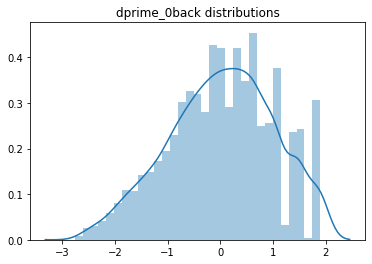


-- dprime_2back --


,dprime_2back
count,5969.000000
mean,0.019465
std,1.005774
min,-2.245394
25%,-0.698047
50%,0.004996
75%,0.753797
max,2.482772


Num. of unique vals: 1948



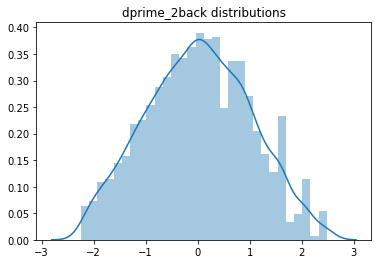

In [5]:
ML.Load_Targets(loc = 'data/nBack_target_vals.csv',
                col_name = ['dprime_0back', 'dprime_2back'],
                data_type = ['f', 'f'])

ML.Show_Targets_Dist()

Use 1000 subjects for the testing set

In [6]:
ML.Train_Test_Split(test_size = 1000)

Preparing final data, in self.all_data
Any changes to loaded data, covars or strat will not be included, from now on.

Final data (w/ target) for modeling loaded shape: (5969, 452)
Performing split on 5969 subjects!
Test split size: 1000

Performed train test split!
Train size: 4969
Test size:  1000


-- dprime_0back --


,dprime_0back
count,4969.000000
mean,0.021062
std,0.998884
min,-2.767154
25%,-0.668486
50%,0.066887
75%,0.763503
max,1.899345


Num. of unique vals: 1249



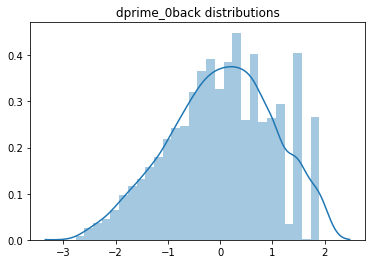


-- dprime_2back --


,dprime_2back
count,4969.000000
mean,0.008950
std,1.008924
min,-2.245394
25%,-0.710475
50%,-0.010167
75%,0.745390
max,2.482772


Num. of unique vals: 1822



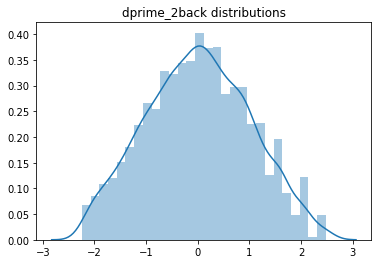


-- dprime_0back --


,dprime_0back
count,1000.000000
mean,0.071123
std,1.000868
min,-2.625707
25%,-0.601610
50%,0.091191
75%,0.763503
max,1.899345


Num. of unique vals: 441



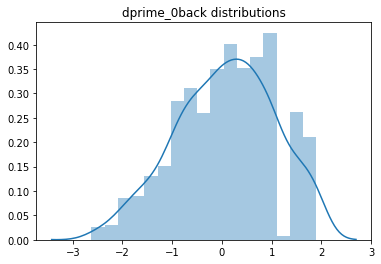


-- dprime_2back --


,dprime_2back
count,1000.000000
mean,0.071710
std,0.988813
min,-2.229086
25%,-0.654151
50%,0.080685
75%,0.777355
max,2.482772


Num. of unique vals: 677



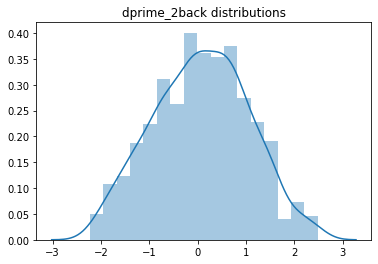

In [7]:
ML.Show_Targets_Dist(subjects='train')
ML.Show_Targets_Dist(subjects='test')

Explore choices for the two ML pipelines, one to be used during search, and one to be used as a final "best" evaluator.

First we will look at 0 back d', and then 2 back d'

0 back d'

In [8]:
ML.Set_Default_ML_Params(problem_type = 'regression',
                         metric = 'r2',
                         scaler = 'robust',
                         n_jobs = 10,
                         target = 0)

Default ML params set within self.default_ML_params.
----------------------
problem_type: regression
target: 0
model: linear
metric: r2
imputer: ['mean', 'median']
imputer_scope: ['float', 'categorical']
scaler: robust
scaler_scope: all
sampler: None
sample_on: targets
feat_selector: None
splits: 3
n_repeats: 2
search_splits: 3
ensemble: basic ensemble
ensemble_split: 0.2
search_type: None
model_params: 0
imputer_params: 0
scaler_params: 0
sampler_params: 0
feat_selector_params: 0
ensemble_params: 0
n_jobs: 10
search_n_iter: 10
feats_to_use: all
subjects_to_use: all
compute_train_score: False
random_state: 1
feat_importances: base
feat_importances_params: 0
cache: None
extra_params: {}



In [9]:
_ = ML.Evaluate(model = 'light gbm',
                scaler = 'standard')

Setting default ML verbosity settings!
Note, if the following values are not desired, call self.Set_Default_ML_Verbosity()
Default ML verbosity set within self.ML_verbosity.
----------------------
save_results: False
progress_bar: True
show_init_params: True
fold_name: False
time_per_fold: False
score_per_fold: False
fold_sizes: False
best_params: False
save_to_logs: False

Running Evaluate with:
target = 0
problem_type = regression
model = light gbm
model_params = 0
metric = r2
scaler = standard
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: light gbm



KeyboardInterrupt: 

In [ ]:
_ = ML.Evaluate(model = 'light gbm')

In [ ]:
_ = ML.Evaluate(model = 'ridge',
                scaler = 'standard')

In [ ]:
_ = ML.Evaluate(model = 'ridge')

In [13]:
_ = ML.Evaluate(model = 'ridge',
                model_params = 1,
                search_type = 'RandomSearch')

Running Evaluate with:
target = 0
problem_type = regression
model = ridge
model_params = 1
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = RandomSearch
search_splits = 3
search_n_iter = 10
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: ridge1






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.19440916979548714
Macro Std in Validation score:  0.0027519014108203788
Micro Std in Validation score:  0.01929671354576453



In [14]:
_ = ML.Evaluate(model = 'ridge',
                model_params = 1,
                search_type = 'RandomSearch',
                search_n_iter = 5)

Running Evaluate with:
target = 0
problem_type = regression
model = ridge
model_params = 1
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = RandomSearch
search_splits = 3
search_n_iter = 5
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: ridge2






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.1926832705133627
Macro Std in Validation score:  0.002894756573798271
Micro Std in Validation score:  0.019471359371216593



In [15]:
_ = ML.Evaluate(model = 'rf')

Running Evaluate with:
target = 0
problem_type = regression
model = rf
model_params = 0
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: rf






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.1866934713713888
Macro Std in Validation score:  0.0016889496098657364
Micro Std in Validation score:  0.015549161876669777



In [16]:
_ = ML.Evaluate(model = 'linear svm')

Running Evaluate with:
target = 0
problem_type = regression
model = linear svm
model_params = 0
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: linear svm



Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.





Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.10224040015986491
Macro Std in Validation score:  0.005365478963603135
Micro Std in Validation score:  0.028960942307398665



Liblinear failed to converge, increase the number of iterations.


In [17]:
_ = ML.Evaluate(model = 'xgb')

Running Evaluate with:
target = 0
problem_type = regression
model = xgb
model_params = 0
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: xgb






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.1903237893705526
Macro Std in Validation score:  0.0019980503355001844
Micro Std in Validation score:  0.017480258034803058



In [18]:
_ = ML.Evaluate(model = 'svm')

Running Evaluate with:
target = 0
problem_type = regression
model = svm
model_params = 0
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: svm






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.1977716137470898
Macro Std in Validation score:  0.0007913898220273802
Micro Std in Validation score:  0.019042077242394675



In [19]:
_ = ML.Evaluate(model = 'ridge',
                model_params = 1,
                search_type = 'RandomSearch',
                search_n_iter = 30)

Running Evaluate with:
target = 0
problem_type = regression
model = ridge
model_params = 1
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = RandomSearch
search_splits = 3
search_n_iter = 30
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: ridge3






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.19440916979548714
Macro Std in Validation score:  0.0027519014108203788
Micro Std in Validation score:  0.01929671354576453



In [20]:
_ = ML.Evaluate(model = 'linear svm',
                model_params = 1,
                search_type = 'RandomSearch',
                search_n_iter = 30)

Running Evaluate with:
target = 0
problem_type = regression
model = linear svm
model_params = 1
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = RandomSearch
search_splits = 3
search_n_iter = 30
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: linear svm0






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.12565185758608582
Macro Std in Validation score:  0.0075993638636088
Micro Std in Validation score:  0.02687565277633316



Let's explore now predicted 2-back prime

In [10]:
ML.Set_Default_ML_Params(target = 1)

Default ML params set within self.default_ML_params.
----------------------
problem_type: regression
target: 1
model: linear
metric: r2
imputer: ['mean', 'median']
imputer_scope: ['float', 'categorical']
scaler: robust
scaler_scope: all
sampler: None
sample_on: targets
feat_selector: None
splits: 3
n_repeats: 2
search_splits: 3
ensemble: basic ensemble
ensemble_split: 0.2
search_type: None
model_params: 0
imputer_params: 0
scaler_params: 0
sampler_params: 0
feat_selector_params: 0
ensemble_params: 0
n_jobs: 10
search_n_iter: 10
feats_to_use: all
subjects_to_use: all
compute_train_score: False
random_state: 1
feat_importances: base
feat_importances_params: 0
cache: None
extra_params: {}



In [22]:
_ = ML.Evaluate(model = 'light gbm',
                scaler = 'standard')

Running Evaluate with:
target = 1
problem_type = regression
model = light gbm
model_params = 0
metric = r2
scaler = standard
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: light gbm1






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.08496070796098021
Macro Std in Validation score:  0.0032711729386080135
Micro Std in Validation score:  0.013879595297572206



In [23]:
_ = ML.Evaluate(model = 'light gbm',
                scaler = 'robust')

Running Evaluate with:
target = 1
problem_type = regression
model = light gbm
model_params = 0
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: light gbm2






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.09084902672839298
Macro Std in Validation score:  0.0042611867338629775
Micro Std in Validation score:  0.013108703502095443



In [24]:
_ = ML.Evaluate(model = 'ridge')

Running Evaluate with:
target = 1
problem_type = regression
model = ridge
model_params = 0
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: ridge4






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.0554433900443825
Macro Std in Validation score:  0.0007358034235001587
Micro Std in Validation score:  0.008316112431354572



In [11]:
_ = ML.Evaluate(model = 'xgb')

Running Evaluate with:
target = 1
problem_type = regression
model = xgb
model_params = 0
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: xgb






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.10592446068456783
Macro Std in Validation score:  0.00044585550984538314
Micro Std in Validation score:  0.006224970864577103



In [ ]:
_ = ML.Evaluate(model = 'xgb',
                model_params = {'objective':'reg:squarederror'})

Running Evaluate with:
target = 1
problem_type = regression
model = xgb
model_params = {'objective': 'reg:squarederror'}
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: xgb0

Search type is set to None! Therefore no hyper-param search will be conducted, even though params were passed.



In [12]:
ML.Model_Pipeline.Model

Pipeline(memory=None,
         steps=[('col_robust',
                 InPlaceColumnTransformer(n_jobs=None, remainder='passthrough',
                                          sparse_threshold=0,
                                          transformer_weights=None,
                                          transformers=[('robust',
                                                         RobustScaler(copy=True,
                                                                      quantile_range=(5,
                                                                                      95),
                                                                      with_centering=True,
                                                                      with_scaling=True),
                                                         [0, 1, 2, 3, 4, 5, 6,
                                                          7, 8, 9, 10, 11, 12,
                                                          13, 14, 15, 

In [26]:
_ = ML.Evaluate(model = 'svm')

Running Evaluate with:
target = 1
problem_type = regression
model = svm
model_params = 0
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: svm0






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.11350706231171304
Macro Std in Validation score:  0.00021589017206795347
Micro Std in Validation score:  0.007436726837268272



In [27]:
_ = ML.Evaluate(model = 'rf')

Running Evaluate with:
target = 1
problem_type = regression
model = rf
model_params = 0
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: rf0






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.10222303422319816
Macro Std in Validation score:  0.0014904332413704369
Micro Std in Validation score:  0.006877935162880662



In [28]:
_ = ML.Evaluate(model = 'ridge',
                model_params = 1,
                search_type = 'RandomSearch',
                search_n_iter = 10)

Running Evaluate with:
target = 1
problem_type = regression
model = ridge
model_params = 1
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = RandomSearch
search_splits = 3
search_n_iter = 10
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: ridge5






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.09821852387087107
Macro Std in Validation score:  0.0007002501996614327
Micro Std in Validation score:  0.009797906813298984



In [29]:
_ = ML.Evaluate(model = 'ridge',
                model_params = 1,
                search_type = 'RandomSearch',
                search_n_iter = 5)

Running Evaluate with:
target = 1
problem_type = regression
model = ridge
model_params = 1
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = RandomSearch
search_splits = 3
search_n_iter = 5
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: ridge6






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.09674122995180495
Macro Std in Validation score:  0.0006497704282671379
Micro Std in Validation score:  0.009730177790171785

